**Exercise 1**: 

(a) Reduce the "ZIP-code"-dataset to two dimensions using Oja’s algorithm and plot the point cloud of the data set highlighting each class.

(b) Try one of the previously implemented classifiers (k-NN or Logistic Regression) on the two-dimensional dataset.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_lfw_people
from matplotlib import pyplot as plt
import random

path_to_train = 'zip.train'
path_to_test = 'zip.test'
training_data = np.array(pd.read_csv(path_to_train, sep=' ', header=None))
test_data = np.array(pd.read_csv(path_to_test, sep =' ',header=None))

X_train, y_train = training_data[:,1:-1], training_data[:,0]
X_test, y_test = test_data[:,1:], test_data[:,0]

# subtract mean to center points
X_train = X_train - np.mean(X_train, axis=0)
X_test = X_test - np.mean(X_test, axis=0)

# returns vec with length of 1
def normalize(vec):
    return vec / np.linalg.norm(vec)

class PCA():
    def fit(self, x, gamma_init, deterioration_rate):
        x = np.copy(x)
        self.ws = np.zeros((x.shape[1],x.shape[1]))
        for i in range(x.shape[1]):
            np.random.shuffle(x)
            self.ws[i] = x[-1, :]
            gamma = gamma_init
            for sample in x:
                scalar = np.dot(self.ws[i].T, sample)
                self.ws[i] = self.ws[i] + gamma * scalar * (sample - (scalar * self.ws[i]))
                self.ws[i] = normalize(self.ws[i])
                gamma = gamma * deterioration_rate
                
            for j in range(x.shape[0]):
                x[j] = x[j] - (np.dot(self.ws[i].T, x[j]) * self.ws[i])
                        
    def transform(self, x, new_dims):
        return np.dot(x, self.ws.T[:,:new_dims])


In [2]:
pca = PCA()
X_train = X_train - np.mean(X_train, axis=0)
X_test = X_test - np.mean(X_test, axis=0)
pca.fit(X_train, 0.2, 0.9)
X_train_transformed = pca.transform(X_train, 2)
X_test_transformed = pca.transform(X_test, 2)

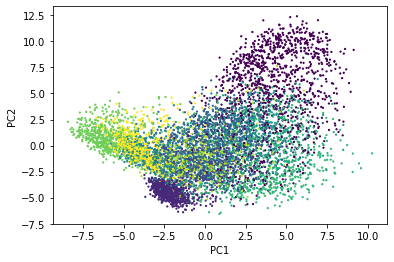

In [3]:
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.scatter(X_train_transformed[:,0], X_train_transformed[:,1], c=y_train, s=1.5)

In [4]:
class Classifier:
    def accuracy(self, labels, predictions):
        return np.mean(labels == predictions)
    
    def confusion_matrix(self, labels, predictions):
        size = len(set(labels))
        matrix = np.zeros((size, size))
        for correct, predicted in zip(labels.astype(int), predictions):
            matrix[correct][predicted] += 1
        return matrix

class KNearestNeighbors(Classifier):
    
    def euclidean_distance(self, x_1, x_2):
        return np.sum((x_1-x_2)**2, axis=1)
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        
    def predict(self, X_test, k):
        predictions = []
        for sample in X_test:
            distances = self.euclidean_distance(self.X, sample)
            indices = np.argpartition(distances, k)[:k]
            votes = (self.y[indices]).astype(int)
            winner = np.argmax(np.bincount(votes, minlength = 10))
            predictions += [winner]
        print('Predictions for k=%d complete' %k)
        return predictions
    
clf = KNearestNeighbors()
clf.fit(X_train_transformed, y_train)
y_pred = clf.predict(X_test_transformed, 20)
print(f"KNN on the 2 dimensional test data set has an accuracy of: {round(clf.accuracy(y_test, y_pred) * 100, 4)}%")

Predictions for k=20 complete
KNN on the 2 dimensional test data set has an accuracy of: 54.6587%


**Exercise 2**: 

Use your implementation of PCA on the greyscale-version of the "LFWcrop Face"-Dataset1.Visualize the first two principal components as Eigenfaces.

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7
image_height: 50
image_width: 37
(5,)


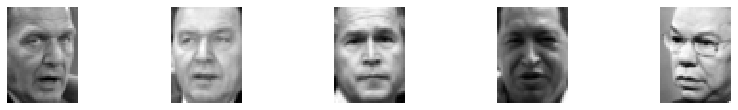

In [5]:
# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)
print("image_height: %d" % h)
print("image_width: %d" % w)


def show_faces(X, num_samples):
    indices = np.random.choice(range(len(X)), num_samples)
    print(indices.shape)
    sample_digits = X[indices]

    fig = plt.figure(figsize=(20, 6))

    for i in range(num_samples):
        ax = plt.subplot(3, 7.5, i + 1)
        img = sample_digits[i].reshape((h, w))
        plt.imshow(img, cmap='gray')
        plt.axis('off')
show_faces(X, 5)

In [6]:
pca = PCA()
X = X - np.mean(X, axis=0)
pca.fit(X, 0.2, 0.9)

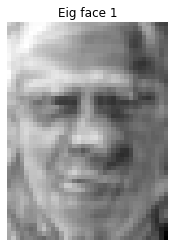

In [7]:
face_1 = pca.ws[0, :].reshape((h, w))
face_2 = pca.ws[1, :].reshape((h, w))
plt.imshow(face_1, cmap="gray")
plt.title("Eig face 1")
plt.axis('off')
plt.show()

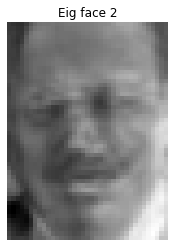

In [8]:
plt.imshow(face_2, cmap="gray")
plt.title("Eig face 2")
plt.axis('off')
plt.show()